# Test script to replace color in an image

Reference : 
* <https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/>
* <https://stackoverflow.com/questions/46903885/map-rgb-semantic-maps-to-one-hot-encodings-and-vice-versa-in-tensorflow>
* <https://datascience.stackexchange.com/questions/48338/why-are-my-predictions-broken-when-performing-image-segmentation-with-tensorflow>
* <https://stackoverflow.com/questions/60761711/how-to-convert-multi-class-one-hot-tensor-to-rgb-in-tensorflow>
* <https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/>
* <https://discuss.pytorch.org/t/converting-class-tensor-from-segmentation-to-image/57165>

Import necessary library

In [47]:
!pip install --no-index torchvision

Ignoring pip: markers 'python_version < "3"' don't match your environment


In [48]:
from PIL import Image
import numpy as np
import os
from skimage import io
import math
import torch
import tensorflow as tf
import scipy.misc
import torchvision.transforms as transforms

Load ground truth image and check the shape and the uniq colors

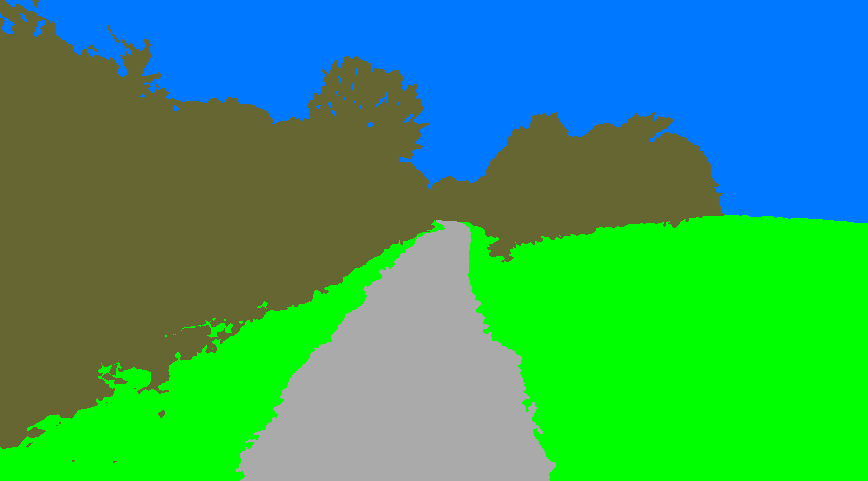

In [2]:
home_gt='/home/vincelf/downloads/freiburg_forest_annotated/test/GT_color'
gt_color='b1-09517_Clipped.png'
gt_color_f = os.path.join(home_gt, gt_color)
#gt_color_img = io.imread(gt_color_f)
#gt_color_img.shape
#(481, 868, 3)
gt_color_img = Image.open(gt_color_f)
gt_color_img

In [3]:
gt_color_img_rgb = gt_color_img.convert('RGB')
gt_data = np.array(gt_color_img_rgb)   # "data" is a height x width x 4 numpy array
gt_data.shape

(481, 868, 3)

In [4]:
gt_color_ref = set( tuple(v) for m2d in gt_data for v in m2d )
gt_color_ref

{(0, 120, 255), (0, 255, 0), (102, 102, 51), (170, 170, 170)}

Load predicted image and check the shape and the uniq colors

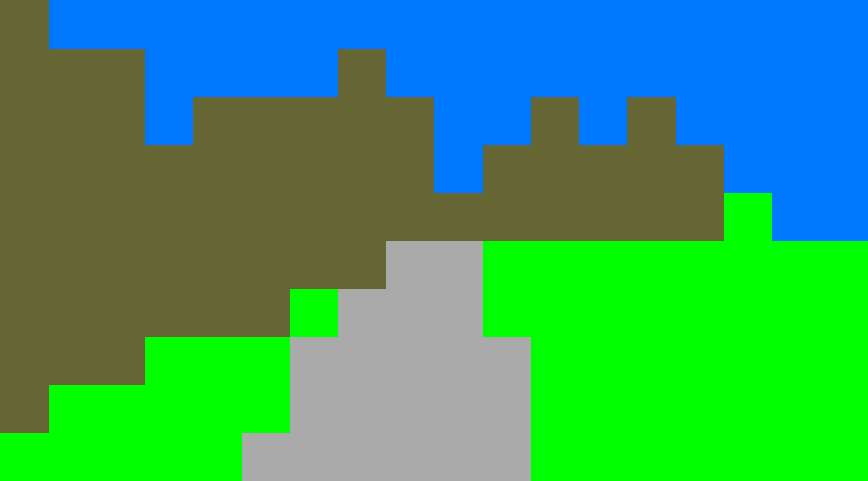

In [5]:
home_pred='/home/vincelf/upload'
color_pred='b1-09517_Clipped_pred_new_color.jpg'
color_pred_f = os.path.join(home_pred, color_pred)
color_pred_img_io_imread = io.imread(color_pred_f)
color_pred_img = Image.open(color_pred_f)
color_pred_img

In [6]:
color_pred_img_rgb = color_pred_img.convert('RGB')
pred_data = np.array(color_pred_img_rgb)   # "data" is a height x width x 4 numpy array
pred_data.shape

(481, 868, 3)

check the uniq colors

In [7]:
color_set = set( tuple(v) for m2d in pred_data for v in m2d )
color_set

{(0, 118, 254),
 (0, 119, 255),
 (0, 120, 253),
 (0, 120, 255),
 (0, 121, 254),
 (0, 121, 255),
 (0, 254, 0),
 (0, 255, 0),
 (0, 255, 1),
 (1, 119, 255),
 (1, 255, 0),
 (1, 255, 1),
 (2, 120, 254),
 (2, 120, 255),
 (100, 102, 52),
 (100, 103, 50),
 (101, 101, 49),
 (101, 101, 51),
 (101, 103, 53),
 (101, 104, 51),
 (102, 100, 51),
 (102, 101, 53),
 (102, 102, 48),
 (102, 102, 50),
 (102, 102, 52),
 (103, 101, 50),
 (103, 101, 52),
 (103, 101, 53),
 (103, 103, 51),
 (103, 103, 53),
 (104, 102, 51),
 (104, 102, 53),
 (169, 169, 169),
 (169, 171, 168),
 (169, 171, 170),
 (170, 170, 168),
 (170, 170, 170),
 (170, 170, 172),
 (170, 172, 171),
 (171, 169, 170),
 (171, 169, 172),
 (171, 171, 169),
 (171, 171, 171),
 (171, 171, 173),
 (172, 170, 171),
 (172, 171, 169)}

In [8]:
ref_color_set = gt_color_ref
color_set_map = []
for color in color_set:
    these_ref_color = []
    c1 = color[0] + 0.00001
    for ref_color in ref_color_set:
        ref_c1 = ref_color[0] + 0.00001
        rel_c1 = round(math.sqrt(abs(c1 - ref_c1)**2))
        if( rel_c1 <= 2 ):
            these_ref_color.append(ref_color)
    print(these_ref_color)
    # loop in the sub array if more than one color
    this_ref_color = ()
    c2 = color[1] + 0.00001
    for ref_color in these_ref_color:
        ref_c2 = ref_color[1] + 0.00001
        rel_c2 = round(math.sqrt(abs(c2 - ref_c2)**2))
        if( rel_c2 <= 2 ):
            this_ref_color = ref_color
    print(color, round(c1), round(ref_c1), round(c2), round(ref_c2), this_ref_color)
    color_set_map.append([color, this_ref_color])
print(color_set_map)

[(102, 102, 51)]
(101, 101, 49) 101.0 0.0 101.0 102.0 (102, 102, 51)
[(0, 255, 0), (0, 120, 255)]
(0, 255, 1) 0.0 0.0 255.0 120.0 (0, 255, 0)
[(170, 170, 170)]
(171, 169, 170) 171.0 0.0 169.0 170.0 (170, 170, 170)
[(102, 102, 51)]
(104, 102, 51) 104.0 0.0 102.0 102.0 (102, 102, 51)
[(102, 102, 51)]
(101, 101, 51) 101.0 0.0 101.0 102.0 (102, 102, 51)
[(0, 255, 0), (0, 120, 255)]
(0, 120, 255) 0.0 0.0 120.0 120.0 (0, 120, 255)
[(170, 170, 170)]
(169, 169, 169) 169.0 0.0 169.0 170.0 (170, 170, 170)
[(170, 170, 170)]
(170, 170, 170) 170.0 0.0 170.0 170.0 (170, 170, 170)
[(170, 170, 170)]
(172, 171, 169) 172.0 0.0 171.0 170.0 (170, 170, 170)
[(0, 255, 0), (0, 120, 255)]
(0, 120, 253) 0.0 0.0 120.0 120.0 (0, 120, 255)
[(102, 102, 51)]
(100, 103, 50) 100.0 0.0 103.0 102.0 (102, 102, 51)
[(102, 102, 51)]
(102, 100, 51) 102.0 0.0 100.0 102.0 (102, 102, 51)
[(170, 170, 170)]
(170, 170, 168) 170.0 0.0 170.0 170.0 (170, 170, 170)
[(0, 255, 0), (0, 120, 255)]
(2, 120, 255) 2.0 0.0 120.0 120.0 (0, 1

In [9]:
red, green, blue = pred_data.T # Temporarily unpack the bands for readability
red, green, blue

(array([[102, 102, 102, ...,   0,   0,   0],
        [102, 102, 102, ...,   0,   0,   0],
        [102, 102, 102, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8),
 array([[102, 102, 102, ..., 255, 255, 255],
        [102, 102, 102, ..., 255, 255, 255],
        [102, 102, 102, ..., 255, 255, 255],
        ...,
        [120, 120, 120, ..., 255, 255, 255],
        [120, 120, 120, ..., 255, 255, 255],
        [120, 120, 120, ..., 255, 255, 255]], dtype=uint8),
 array([[ 52,  52,  52, ...,   1,   1,   1],
        [ 52,  52,  52, ...,   1,   1,   1],
        [ 52,  52,  52, ...,   1,   1,   1],
        ...,
        [255, 255, 255, ...,   1,   1,   1],
        [255, 255, 255, ...,   1,   1,   1],
        [255, 255, 255, ...,   1,   1,   1]], dtype=uint8))

replace some color by it's reference

In [10]:
# Replace pred_color with reference
# source: https://stackoverflow.com/questions/3752476/python-pil-replace-a-single-rgba-color
# some_color = (red == 101) & (green == 101) & (blue == 49)
# pred_data[some_color.T] = (102, 102, 51) # Transpose back needed

In [11]:
for c in color_set_map:
    # Replace pred_color with reference
    some_color = (red == c[0][0]) & (green == c[0][1]) & (blue == c[0][2])
    pred_data[some_color.T] = (c[1][0], c[1][1], c[1][2]) # Transpose back needed

In [113]:
pred_data.shape

(481, 868, 3)

In [114]:
pred_data

array([[[102, 102,  51],
        [102, 102,  51],
        [102, 102,  51],
        ...,
        [  0, 120, 255],
        [  0, 120, 255],
        [  0, 120, 255]],

       [[102, 102,  51],
        [102, 102,  51],
        [102, 102,  51],
        ...,
        [  0, 120, 255],
        [  0, 120, 255],
        [  0, 120, 255]],

       [[102, 102,  51],
        [102, 102,  51],
        [102, 102,  51],
        ...,
        [  0, 120, 255],
        [  0, 120, 255],
        [  0, 120, 255]],

       ...,

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]]

In [12]:
color_set = set( tuple(v) for m2d in pred_data for v in m2d )
color_set

{(0, 120, 255), (0, 255, 0), (102, 102, 51), (170, 170, 170)}

reconvert into an image

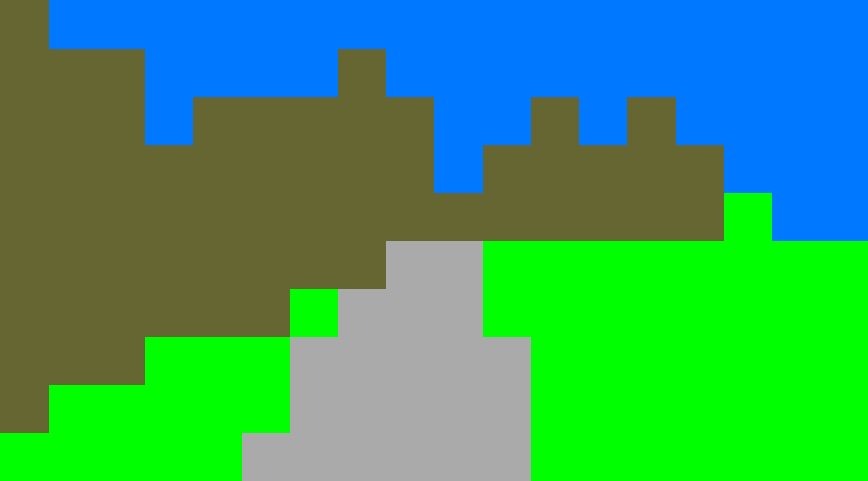

In [109]:
im2 = Image.fromarray(pred_data)
im2

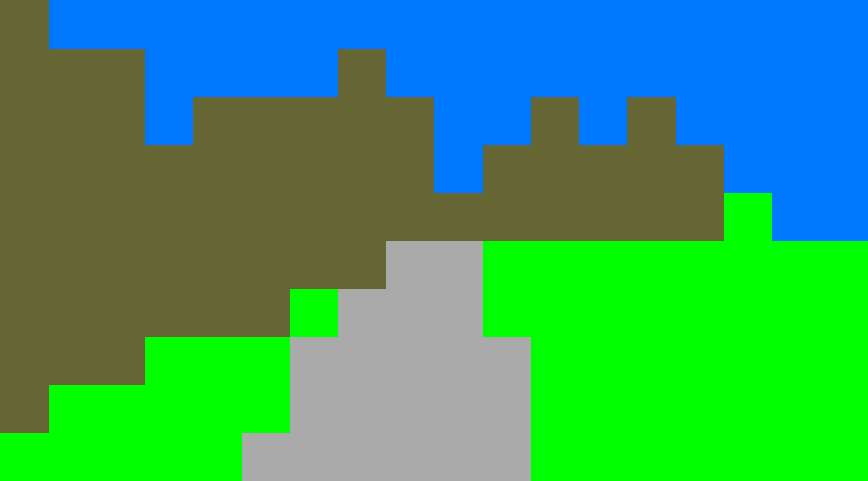

In [110]:
color_pred_img_rgb

convert color to class

In [24]:
#palette = np.array([(0, 120, 255), (0, 255, 0), (102, 102, 51), (170, 170, 170)], np.uint8)
palette = np.array(list(gt_color_ref), np.uint8)
palette

array([[170, 170, 170],
       [102, 102,  51],
       [  0, 255,   0],
       [  0, 120, 255]], dtype=uint8)

In [25]:
color_pred_img_io_imread

array([[[102, 102,  52],
        [102, 102,  52],
        [102, 102,  52],
        ...,
        [  0, 120, 255],
        [  0, 120, 255],
        [  0, 120, 255]],

       [[102, 102,  52],
        [102, 102,  52],
        [102, 102,  52],
        ...,
        [  0, 120, 255],
        [  0, 120, 255],
        [  0, 120, 255]],

       [[102, 102,  52],
        [102, 102,  52],
        [102, 102,  52],
        ...,
        [  0, 120, 255],
        [  0, 120, 255],
        [  0, 120, 255]],

       ...,

       [[  0, 255,   1],
        [  0, 255,   1],
        [  0, 255,   1],
        ...,
        [  0, 255,   1],
        [  0, 255,   1],
        [  0, 255,   1]],

       [[  0, 255,   1],
        [  0, 255,   1],
        [  0, 255,   1],
        ...,
        [  0, 255,   1],
        [  0, 255,   1],
        [  0, 255,   1]],

       [[  0, 255,   1],
        [  0, 255,   1],
        [  0, 255,   1],
        ...,
        [  0, 255,   1],
        [  0, 255,   1],
        [  0, 255,   1]]

In [26]:
semantic_map = []
for colour in palette:
  class_map = tf.reduce_all(tf.equal(pred_data, colour), axis=-1)
  semantic_map.append(class_map)
semantic_map

[<tf.Tensor: shape=(481, 868), dtype=bool, numpy=
 array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])>,
 <tf.Tensor: shape=(481, 868), dtype=bool, numpy=
 array([[ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])>,
 <tf.Tensor: shape=(481, 868), dtype=bool, numpy=
 array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, Fals

In [27]:
semantic_map = tf.stack(semantic_map, axis=-1)
semantic_map

<tf.Tensor: shape=(481, 868, 4), dtype=bool, numpy=
array([[[False,  True, False, False],
        [False,  True, False, False],
        [False,  True, False, False],
        ...,
        [False, False, False,  True],
        [False, False, False,  True],
        [False, False, False,  True]],

       [[False,  True, False, False],
        [False,  True, False, False],
        [False,  True, False, False],
        ...,
        [False, False, False,  True],
        [False, False, False,  True],
        [False, False, False,  True]],

       [[False,  True, False, False],
        [False,  True, False, False],
        [False,  True, False, False],
        ...,
        [False, False, False,  True],
        [False, False, False,  True],
        [False, False, False,  True]],

       ...,

       [[False, False,  True, False],
        [False, False,  True, False],
        [False, False,  True, False],
        ...,
        [False, False,  True, False],
        [False, False,  True, False],
   

In [28]:
# NOTE cast to tf.float32 because most neural networks operate in float32.
semantic_map = tf.cast(semantic_map, tf.float32)
semantic_map

<tf.Tensor: shape=(481, 868, 4), dtype=float32, numpy=
array([[[0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        ...,
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.]],

       [[0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        ...,
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.]],

       [[0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        ...,
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.]],

       ...,

       [[0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        ...,
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.]],

       [[0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        ...,
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.]],

       [[0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],

In [29]:
semantic_map.shape

TensorShape([481, 868, 4])

In [30]:
y_pred = np.expand_dims(semantic_map,0)
y_pred

array([[[[0., 1., 0., 0.],
         [0., 1., 0., 0.],
         [0., 1., 0., 0.],
         ...,
         [0., 0., 0., 1.],
         [0., 0., 0., 1.],
         [0., 0., 0., 1.]],

        [[0., 1., 0., 0.],
         [0., 1., 0., 0.],
         [0., 1., 0., 0.],
         ...,
         [0., 0., 0., 1.],
         [0., 0., 0., 1.],
         [0., 0., 0., 1.]],

        [[0., 1., 0., 0.],
         [0., 1., 0., 0.],
         [0., 1., 0., 0.],
         ...,
         [0., 0., 0., 1.],
         [0., 0., 0., 1.],
         [0., 0., 0., 1.]],

        ...,

        [[0., 0., 1., 0.],
         [0., 0., 1., 0.],
         [0., 0., 1., 0.],
         ...,
         [0., 0., 1., 0.],
         [0., 0., 1., 0.],
         [0., 0., 1., 0.]],

        [[0., 0., 1., 0.],
         [0., 0., 1., 0.],
         [0., 0., 1., 0.],
         ...,
         [0., 0., 1., 0.],
         [0., 0., 1., 0.],
         [0., 0., 1., 0.]],

        [[0., 0., 1., 0.],
         [0., 0., 1., 0.],
         [0., 0., 1., 0.],
         ...,
 

In [54]:
y_pred.shape

(1, 481, 868, 4)

In [55]:
def iou_score(y_true, y_pred):
  intersection = np.logical_and(y_true, y_pred)
  union = np.logical_or(y_true, y_pred)
  iou_score = np.sum(intersection) / np.sum(union)
  return iou_score

In [57]:
gt_semantic_map = []
for colour in palette:
  class_map = tf.reduce_all(tf.equal(gt_data, colour), axis=-1)
  gt_semantic_map.append(class_map)
gt_semantic_map
gt_semantic_map = tf.stack(gt_semantic_map, axis=-1)
gt_semantic_map
# NOTE cast to tf.float32 because most neural networks operate in float32.
gt_semantic_map = tf.cast(gt_semantic_map, tf.float32)
gt_semantic_map
y_true = np.expand_dims(gt_semantic_map,0)
y_true.shape

(1, 481, 868, 4)

In [58]:
iou_score(y_true, y_pred)

0.8455390749495525

In [59]:
#palette = tf.constant(palette, dtype=tf.uint8)
#palette

In [60]:
#class_indexes = tf.argmax(semantic_map, axis=-1)
#class_indexes.shape

In [61]:
#new = np.expand_dims(class_indexes,0)
#new.shape

In [62]:
#new2 = np.stack((new,)*4,-1)
#new2.shape

In [63]:
#new2

In [64]:
# NOTE this operation flattens class_indexes
#class_indexes = tf.reshape(class_indexes, [-1])
#class_indexes

In [65]:
#color_image = tf.gather(palette, class_indexes)
#color_image

In [77]:
x = torch.LongTensor(palette)
x.shape

torch.Size([4, 3])

In [78]:
arg = torch.LongTensor(y_pred)
arg.shape

torch.Size([1, 481, 868, 4])

In [79]:
#converted_tensor = torch.nn.functional.embedding(arg, x)
#converted_tensor.shape

In [80]:
converted_tensor.shape

torch.Size([1, 481, 868, 4, 3])

In [81]:
#to_pil = transforms.ToPILImage()
#img = to_pil(converted_tensor[0:-1])
#img

In [82]:
def metrics_np(y_true, y_pred, metric_name, metric_type='standard', drop_last = True, mean_per_class=False, verbose=False):
    """ 
    Compute mean metrics of two segmentation masks, via numpy.
    
    IoU(A,B) = |A & B| / (| A U B|)
    Dice(A,B) = 2*|A & B| / (|A| + |B|)
    
    Args:
        y_true: true masks, one-hot encoded.
        y_pred: predicted masks, either softmax outputs, or one-hot encoded.
        metric_name: metric to be computed, either 'iou' or 'dice'.
        metric_type: one of 'standard' (default), 'soft', 'naive'.
          In the standard version, y_pred is one-hot encoded and the mean
          is taken only over classes that are present (in y_true or y_pred).
          The 'soft' version of the metrics are computed without one-hot 
          encoding y_pred.
          The 'naive' version return mean metrics where absent classes contribute
          to the class mean as 1.0 (instead of being dropped from the mean).
        drop_last = True: boolean flag to drop last class (usually reserved
          for background class in semantic segmentation)
        mean_per_class = False: return mean along batch axis for each class.
        verbose = False: print intermediate results such as intersection, union
          (as number of pixels).
    Returns:
        IoU/Dice of y_true and y_pred, as a float, unless mean_per_class == True
          in which case it returns the per-class metric, averaged over the batch.
    
    Inputs are B*W*H*N tensors, with
        B = batch size,
        W = width,
        H = height,
        N = number of classes
    """
    
    assert y_true.shape == y_pred.shape, 'Input masks should be same shape, instead are {}, {}'.format(y_true.shape, y_pred.shape)
    assert len(y_pred.shape) == 4, 'Inputs should be B*W*H*N tensors, instead have shape {}'.format(y_pred.shape)
    
    flag_soft = (metric_type == 'soft')
    flag_naive_mean = (metric_type == 'naive')
    
    num_classes = y_pred.shape[-1]
    # if only 1 class, there is no background class and it should never be dropped
    drop_last = drop_last and num_classes>1
    
    if not flag_soft:
        if num_classes>1:
            # get one-hot encoded masks from y_pred (true masks should already be in correct format, do it anyway)
            y_pred = np.array([ np.argmax(y_pred, axis=-1)==i for i in range(num_classes) ]).transpose(1,2,3,0)
            y_true = np.array([ np.argmax(y_true, axis=-1)==i for i in range(num_classes) ]).transpose(1,2,3,0)
        else:
            y_pred = (y_pred > 0).astype(int)
            y_true = (y_true > 0).astype(int)
    
    # intersection and union shapes are batch_size * n_classes (values = area in pixels)
    axes = (1,2) # W,H axes of each image
    intersection = np.sum(np.abs(y_pred * y_true), axis=axes) # or, np.logical_and(y_pred, y_true) for one-hot
    mask_sum = np.sum(np.abs(y_true), axis=axes) + np.sum(np.abs(y_pred), axis=axes)
    union = mask_sum  - intersection # or, np.logical_or(y_pred, y_true) for one-hot
    
    if verbose:
        print('intersection (pred*true), intersection (pred&true), union (pred+true-inters), union (pred|true)')
        print(intersection, np.sum(np.logical_and(y_pred, y_true), axis=axes), union, np.sum(np.logical_or(y_pred, y_true), axis=axes))
    
    smooth = .001
    iou = (intersection + smooth) / (union + smooth)
    dice = 2*(intersection + smooth)/(mask_sum + smooth)
    
    metric = {'iou': iou, 'dice': dice}[metric_name]
    
    # define mask to be 0 when no pixels are present in either y_true or y_pred, 1 otherwise
    mask =  np.not_equal(union, 0).astype(int)
    # mask = 1 - np.equal(union, 0).astype(int) # True = 1
    
    if drop_last:
        metric = metric[:,:-1]
        mask = mask[:,:-1]
    
    # return mean metrics: remaining axes are (batch, classes)
    # if mean_per_class, average over batch axis only
    # if flag_naive_mean, average over absent classes too
    if mean_per_class:
        if flag_naive_mean:
            return np.mean(metric, axis=0)
        else:
            # mean only over non-absent classes in batch (still return 1 if class absent for whole batch)
            return (np.sum(metric * mask, axis=0) + smooth)/(np.sum(mask, axis=0) + smooth)
    else:
        if flag_naive_mean:
            return np.mean(metric)
        else:
            # mean only over non-absent classes
            class_count = np.sum(mask, axis=0)
            return np.mean(np.sum(metric * mask, axis=0)[class_count!=0]/(class_count[class_count!=0]))
        
def mean_iou_np(y_true, y_pred, **kwargs):
    """
    Compute mean Intersection over Union of two segmentation masks, via numpy.
    
    Calls metrics_np(y_true, y_pred, metric_name='iou'), see there for allowed kwargs.
    """
    return metrics_np(y_true, y_pred, metric_name='iou', **kwargs)

def mean_dice_np(y_true, y_pred, **kwargs):
    """
    Compute mean Dice coefficient of two segmentation masks, via numpy.
    
    Calls metrics_np(y_true, y_pred, metric_name='dice'), see there for allowed kwargs.
    """
    return metrics_np(y_true, y_pred, metric_name='dice', **kwargs)
  
  
  

In [83]:
metrics_np(y_true, y_pred, metric_name='iou', metric_type='standard', drop_last = False, mean_per_class=True, verbose=True)

intersection (pred*true), intersection (pred&true), union (pred+true-inters), union (pred|true)
[[ 44813 128527 112467  96758]] [[ 44813 128527 112467  96758]] [[ 51272 154885 132151 114143]] [[ 51272 154885 132151 114143]]


array([0.87415066, 0.82999214, 0.85119798, 0.84784321])

In [84]:
metrics_np(y_true, y_pred, metric_name='dice', metric_type='standard', drop_last = False, mean_per_class=True, verbose=True)

intersection (pred*true), intersection (pred&true), union (pred+true-inters), union (pred|true)
[[ 44813 128527 112467  96758]] [[ 44813 128527 112467  96758]] [[ 51272 154885 132151 114143]] [[ 51272 154885 132151 114143]]


array([0.93284543, 0.9070905 , 0.91961207, 0.91765031])

In [85]:
magic_number = tf.reduce_sum(semantic_map)
magic_number

<tf.Tensor: shape=(), dtype=float32, numpy=417508.0>

In [88]:
palette = tf.constant(palette, dtype=tf.uint8)
class_indexes = tf.argmax(semantic_map, axis=-1)
# NOTE this operation flattens class_indexes
class_indexes = tf.reshape(class_indexes, [-1])
color_image = tf.gather(palette, class_indexes)
color_image = tf.reshape(color_image, [481, 868, 3])
color_image

<tf.Tensor: shape=(481, 868, 3), dtype=uint8, numpy=
array([[[102, 102,  51],
        [102, 102,  51],
        [102, 102,  51],
        ...,
        [  0, 120, 255],
        [  0, 120, 255],
        [  0, 120, 255]],

       [[102, 102,  51],
        [102, 102,  51],
        [102, 102,  51],
        ...,
        [  0, 120, 255],
        [  0, 120, 255],
        [  0, 120, 255]],

       [[102, 102,  51],
        [102, 102,  51],
        [102, 102,  51],
        ...,
        [  0, 120, 255],
        [  0, 120, 255],
        [  0, 120, 255]],

       ...,

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        ...,
        [  0, 255,   

In [105]:
#color_image_2 = tf.transpose(color_image, perm=[2, 0, 1]).numpy()
#color_image_2.shape

TensorShape([3, 481, 868])

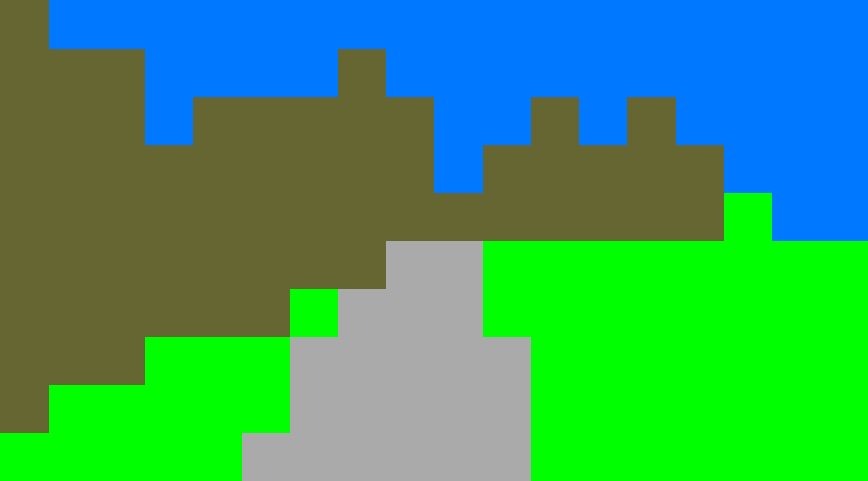

In [108]:
# tf.image.encode_png(color_image)
to_pil = transforms.ToPILImage()
img3 = to_pil(color_image.numpy()).convert('RGB')
img3

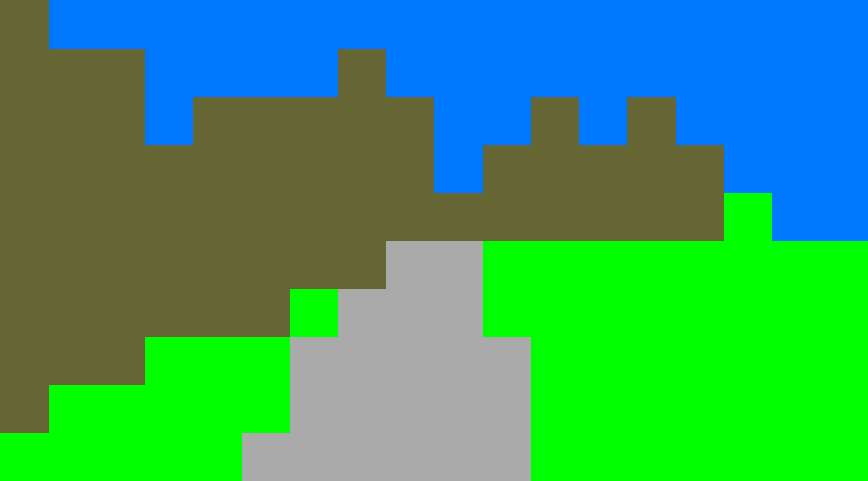

In [111]:
color_pred_img

In [112]:
color_pred_img == img3

False

In [140]:
diff = tf.math.equal(pred_data, color_image)
diff

<tf.Tensor: shape=(481, 868, 3), dtype=bool, numpy=
array([[[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       ...,

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ...,
        [ True,  True,  T

In [141]:
# tf.boolean_mask(diff, np.array([[[False]]]))
# tf.where([False], diff)

Compare the image

Reference : <https://www.pyimagesearch.com/2017/06/19/image-difference-with-opencv-and-python/>

A SSIM of 1 is a perfect match.

In [130]:
!pip3 install --no-index opencv-python

Ignoring pip: markers 'python_version < "3"' don't match your environment


In [131]:
from skimage.measure import compare_ssim
import cv2

In [136]:
# load the two input images
#imageA = cv2.imread(im2)
#imageB = cv2.imread(im3)

In [137]:
# convert the images to grayscale
grayA = cv2.cvtColor(pred_data, cv2.COLOR_BGR2GRAY)
grayB = cv2.cvtColor(color_image.numpy(), cv2.COLOR_BGR2GRAY)

In [138]:
(score, diff) = compare_ssim(grayA, grayB, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

SSIM: 1.0
